In [12]:
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from virtart.object_detector import ObjectDetector
from virtart.segment import Segmentor
from virtart.style_transfer import StyleTransfer
import warnings
warnings.filterwarnings('ignore')
object_detector = ObjectDetector(device='gpu')
sam = Segmentor()
style_transfer = StyleTransfer()

Loading checkpoint from checkpoints/yolov6n.pt

Fusing model...


In [14]:
from PIL import Image
import numpy as np

img = Image.open('imgs/cr7_messi_extended.jpg')
img_numpy = np.array(img)
new_img_numpy = img_numpy

detections = object_detector(new_img_numpy)

In [15]:
person_bboxes = [detection['bbox'] for detection in detections if detection['class']=='person']
masks = sam(new_img_numpy, person_bboxes)
mask_background = ~np.any(np.array(masks), axis=0)

# Transferring style
From the previously detected objects and created masks, we now put the region of the masks with the style transferred ontop of the original image.

In [16]:
from tqdm import tqdm

style = Image.open('imgs/neural_style_transfer_5_1.jpg')
# background_style = Image.open('imgs/wassily-kandinsky.jpg')
result_img = np.array(img.copy())
losses = []
for mask, style in tqdm(zip(masks, [style, style])):
    styled_img, translation_mask, final_style_loss = style_transfer(new_img_numpy, mask, style)
    losses.append(final_style_loss)
    result_img[mask] = styled_img[translation_mask]


2it [15:09, 454.85s/it]


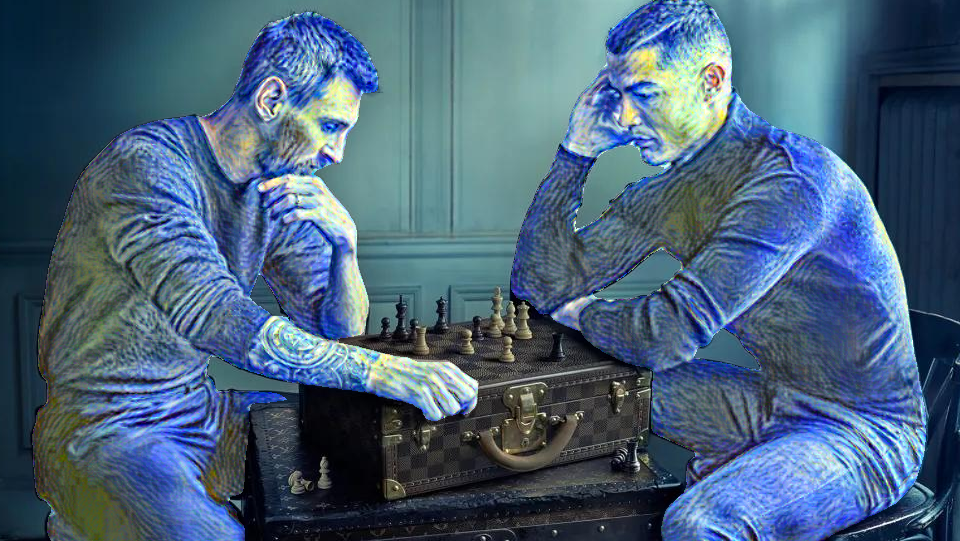

In [17]:

# New to handle padding of bounding boxes!
height, width = result_img.shape[:2]

crop_height = int(height * 0.1)
crop_width = int(width * 0.1)

top = crop_height
bottom = height - crop_height
left = crop_width
right = width - crop_width

cropped_img_array = result_img[top:bottom, left:right]
Image.fromarray(cropped_img_array)

In [18]:
final_style_loss

2.0547013946270454e-05